In [39]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [40]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

# Data Jakarta

In [41]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
 dfJ.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mengatasi MV

In [44]:
dfJ.isna().sum()

created_at    903
LT            903
LB            903
KT            903
KM            903
garasi        980
carport       934
lokasi        903
sertifikat    905
listrik       904
hadap         988
harga         903
URL           903
deskripsi     912
dtype: int64

In [45]:
# Menghapus MV
dfJ.fillna(0, inplace = True)

In [46]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0
1020,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0
1021,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0
1022,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0


## Melihat Tipe Data dalam Tabel Jakarta

In [48]:
# Tipe Datanya : DataFrame (df)
print(type(dfJ))
# Ukuran Data
N, P = dfJ.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 1024, ', Kolom = ', 14)

In [49]:
dfJ.dtypes

created_at     object
LT            float64
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
dtype: object

## Mengubah tipe data dalam Tabel Jakarta


In [50]:
dfJ['KT'] = dfJ['KT'].astype('int64')
dfJ['KM'] = dfJ['KM'].astype('int64')
dfJ['garasi'] = dfJ['garasi'].astype('int64')
dfJ['carport'] = dfJ['carport'].astype('int64')
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')
dfJ['hadap'] = dfJ['hadap'].astype('category')

In [51]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8,3,0,0,Jakarta Pusat,SHM,2200.0,0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2,1,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2,1,0,0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0
1020,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0
1021,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0
1022,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0


## Rumusan Masalah

### Apakah banyaknya kamar tidur mempengaruhi harga jual pada rumah?

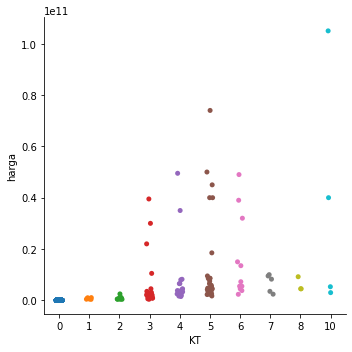

In [54]:
p= sns.catplot(x="KT", y="harga", data=dfJ)
# Apa yang bisa dilihat dari hasil ini?

### Apakah luas tanah mempengaruhi harga jual pada rumah?

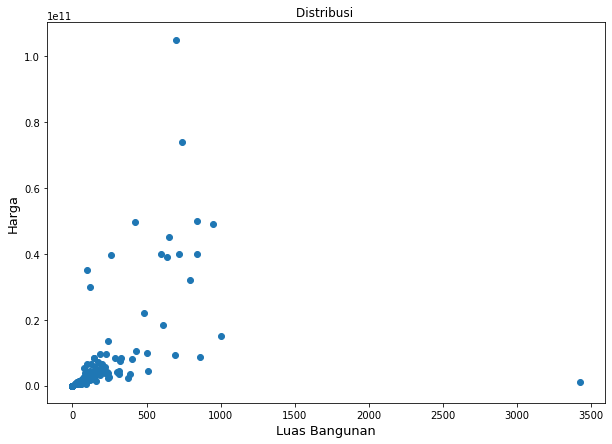

In [58]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x = dfJ['LT'], y = dfJ['harga'])
plt.ylabel('Harga', fontsize=13)
plt.xlabel('Luas Bangunan', fontsize=13)
plt.title('Distribusi ')
plt.show()

# DATA Tangerang

In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfT.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Unnamed: 14,Unnamed: 15
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mengatasi MV

In [ ]:
dfT.isna().sum()

created_at       4
LT               4
LB               4
KT               4
KM               4
garasi          90
carport         36
lokasi           4
sertifikat       6
listrik         17
hadap           79
harga            4
URL              4
deskripsi        4
Unnamed: 14    128
Unnamed: 15    128
dtype: int64

## Melihat tipe data dalam tabel Tangerang

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(dfT))
# Ukuran Data
N, P = dfT.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 128, ', Kolom = ', 16)

In [ ]:
dfT.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi          object
sertifikat      object
listrik        float64
hadap           object
harga          float64
URL             object
deskripsi       object
Unnamed: 14    float64
Unnamed: 15    float64
dtype: object

In [ ]:
# Menghapus MV
dfT.fillna(0, inplace = True)

In [ ]:
# Mengatai